In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import random
import warnings

random.seed()
warnings.filterwarnings('ignore')



In [2]:
df1 = pd.read_excel('EXP1NewExperiment04-01.xlsx')
df2 = pd.read_excel("exp2DrawHistogramData 8 directions.xlsx")
df3 = pd.read_csv("exp3DrawHistogramData.csv")
df2.rename(columns={'被试':'ID'},inplace=True)
df3.rename(columns={'name':'ID'},inplace=True)
df1Selected = df1[df1['data_index'].isin(np.random.choice(df1['data_index'].unique(), size=3, replace=False))]
df2Selected = df2[df2['ID'].isin(np.random.choice(df2['ID'].unique(), size=3, replace=False))]# 改成df2Selected = df2有一堆的显著
df3Selected = df3[df3['ID'].isin(np.random.choice(df3['ID'].unique(), size=3, replace=False))]


In [3]:

def significanceLevel(pValue):
    if pValue < 0.001:
        return '***'
    elif pValue < 0.01:
        return '**'
    elif pValue < 0.05:
        return '*'
    else:
        return ''

def tTestHorizontal(group):
    result = scipy.stats.ttest_ind(group['水平误差'], [0] * len(group['水平误差']))
    return result

def tTestVertical(group):
    result = scipy.stats.ttest_ind(group['垂直误差'], [0] * len(group['水平误差']))
    return result

def shootDirection(x):
    if x in [0,180]:
        return '水平'
    elif x in [45,135]:
        return '斜向上'
    elif x in [90,270]:
        return '竖直'
    elif x in [225,315]:
        return '斜向下'
    
def tTestNoGravityXPE(group):
    result = scipy.stats.ttest_ind(group['xIfNoGravityPredictError'], [0] * len(group['xIfNoGravityPredictError']))
    return result
def tTestNoGravityYPE(group):
    result = scipy.stats.ttest_ind(group['yIfNoGravityPredictError'], [0] * len(group['yIfNoGravityPredictError']))
    return result
def tTestGravityXPE(group):
    result = scipy.stats.ttest_ind(group['xIfGravityPredictError'], [0] * len(group['xIfGravityPredictError']))
    return result
def tTestGravityYPE(group):
    result = scipy.stats.ttest_ind(group['yIfGravityPredictError'], [0] * len(group['yIfGravityPredictError']))
    return result



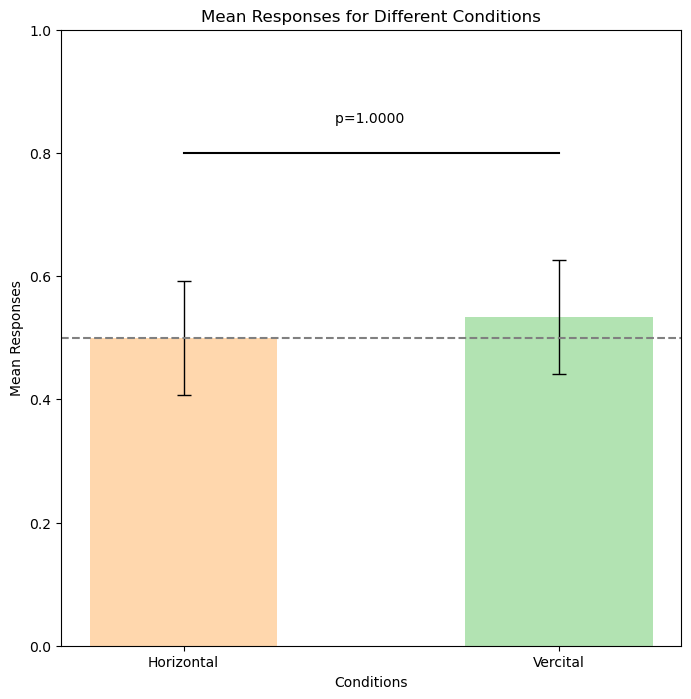

<Figure size 640x480 with 0 Axes>

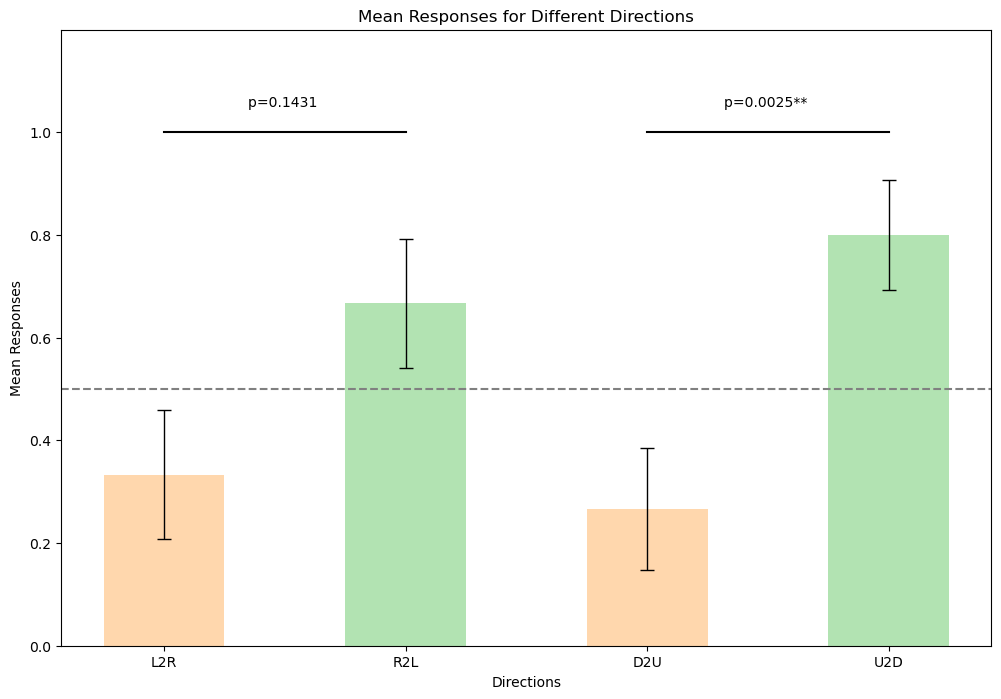

In [4]:
df1SelectedConditions = df1Selected.groupby('conditions')['responses'].agg(['mean','sem'])
df1SelectedDirections = df1Selected.groupby(['conditions','directions'])['responses'].agg(['mean','sem'])

ratio = [
    [30*df1SelectedConditions.iloc[0,0],30*(1-df1SelectedConditions.iloc[0,0])],
    [30*df1SelectedConditions.iloc[1,0],30*(1-df1SelectedConditions.iloc[1,0])]
]

pValueHorizontal = scipy.stats.binom_test(30*df1SelectedConditions.iloc[0,0],30, p=0.5, alternative='greater')
pValueVertical = scipy.stats.binom_test(30*df1SelectedConditions.iloc[1,0],30, p=0.5, alternative='greater')
odds_ratio, pValueBetween = scipy.stats.fisher_exact(ratio)

plt.figure(figsize=(8,8))

plt.bar(['Horizontal','Vercital'],df1SelectedConditions['mean'],
        width=.5,color = ['#FFD7AD','#B2E3B2'])
plt.errorbar(['Horizontal','Vercital'], df1SelectedConditions['mean'], 
             yerr=df1SelectedConditions['sem'], fmt='none', ecolor='black', capsize=5, linewidth=1)
plt.ylim([0,1])
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.xlabel('Conditions')
plt.ylabel('Mean Responses')
plt.title('Mean Responses for Different Conditions')
# plt.text(0.2, df1SelectedConditions.iloc[0,0]+0.05, f'p={pValueHorizontal:.4f}{significanceLevel(pValueHorizontal)} ', ha='center')
# plt.text(1.2, df1SelectedConditions.iloc[1,0]+0.05, f'p={pValueVertical:.4f}{significanceLevel(pValueVertical)} ', ha='center')
plt.text(0.5, 0.85, f'p={pValueBetween:.4f}{significanceLevel(pValueBetween)} ', ha='center')
plt.plot([0,1],[0.8,0.8],'-',color = 'black')
plt.savefig('Exp1-a.png')
plt.show()
plt.close('all')
plt.clf()
   
ratioHorizontal = [
    [15*df1SelectedDirections.iloc[0,0],15*(1-df1SelectedDirections.iloc[0,0])],
    [15*df1SelectedDirections.iloc[1,0],15*(1-df1SelectedDirections.iloc[1,0])]
]
ratioVertical =[
    [15*df1SelectedDirections.iloc[2,0],15*(1-df1SelectedDirections.iloc[2,0])],
    [15*df1SelectedDirections.iloc[3,0],15*(1-df1SelectedDirections.iloc[3,0])]
]
# tStatHorizontal, pValueHorizontal = scipy.stats.ttest_1samp(horizontalResponses, 0.5)
# tStatVertical, pValueVertical = scipy.stats.ttest_1samp(verticalResponses, 0.5)
pValueL2R = scipy.stats.binom_test(15*df1SelectedDirections.iloc[0,0],15, p=0.5, alternative='less')
pValueR2L = scipy.stats.binom_test(15*df1SelectedDirections.iloc[1,0],15, p=0.5, alternative='greater')
pValueD2U = scipy.stats.binom_test(15*df1SelectedDirections.iloc[2,0],15, p=0.5, alternative='less')
pValueU2D = scipy.stats.binom_test(15*df1SelectedDirections.iloc[3,0],15, p=0.5, alternative='greater')
odds_ratio, pValueBetweenHorizontal = scipy.stats.fisher_exact(ratioHorizontal)
odds_ratio, pValueBetweenVercical = scipy.stats.fisher_exact(ratioVertical)
variableName =['L2R','R2L','D2U','U2D']

plt.figure(figsize=(12,8))

plt.bar(variableName,df1SelectedDirections['mean'],
        width=.5,color = ['#FFD7AD','#B2E3B2'])
plt.errorbar(variableName, df1SelectedDirections['mean'], 
             yerr=df1SelectedDirections['sem'], fmt='none', ecolor='black', capsize=5, linewidth=1)
plt.ylim([0,1.2])
plt.yticks([0,0.2,0.4,0.6,0.8,1.0])
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.xlabel('Directions')
plt.ylabel('Mean Responses')
plt.title('Mean Responses for Different Directions')
# plt.text(0.2, df1SelectedDirections.iloc[0,0]+0.07, f'p={pValueL2R:.4f}{significanceLevel(pValueL2R)} ', ha='center')
# plt.text(1.2, df1SelectedDirections.iloc[1,0]+0.07, f'p={pValueR2L:.4f}{significanceLevel(pValueR2L)} ', ha='center')
plt.text(0.5, 1.05, f'p={pValueBetweenHorizontal:.4f}{significanceLevel(pValueBetweenHorizontal)} ', ha='center')
# plt.text(2.2, df1SelectedDirections.iloc[2,0]+0.07, f'p={pValueD2U:.4f}{significanceLevel(pValueD2U)} ', ha='center')
# plt.text(3.2, df1SelectedDirections.iloc[3,0]+0.07, f'p={pValueU2D:.4f}{significanceLevel(pValueU2D)} ', ha='center')
plt.text(2.5, 1.05, f'p={pValueBetweenVercical:.4f}{significanceLevel(pValueBetweenVercical)} ', ha='center')
plt.plot([0,1],[1.0,1.0],'-',color = 'black')
plt.plot([2,3],[1.0,1.0],'-',color = 'black')
plt.savefig('Exp1-b.png')
plt.show()

plt.close('all')

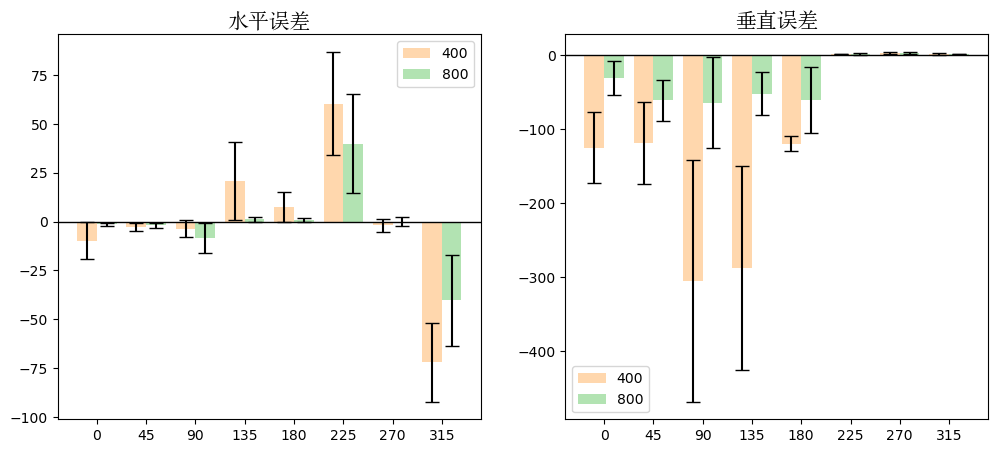

In [5]:
df2Selected.rename(columns={'发射方向':'角度'},inplace=True)
df2Selected['发射方向'] = df2Selected['角度'].apply(shootDirection)

tAngleHorizontal = df2Selected.groupby(['角度', '速度']).apply(tTestHorizontal)
tAngleVertical = df2Selected.groupby(['角度', '速度']).apply(tTestVertical)

for multiIndex,i  in tAngleHorizontal.items():
    if i[1]<0.05:
        # print(f'horizontal significant{multiIndex}, p = {i[1]}')
        with open ('significanceTest.txt','a') as f:
            f.write(f'horizontal significant{multiIndex}, p = {i[1]}')
for multiIndex,i  in tAngleVertical.items():
    if i[1]<0.05:
        # print(f'vertical significant{multiIndex}, p = {i[1]}')
        with open ('significanceTest.txt','a') as f:
            f.write(f'vertical significant{multiIndex}, p = {i[1]}')
        

df2SelectedAnglesHorizontal = df2Selected.groupby(['角度','速度'])['水平误差'].agg(['mean','sem'])
df2SelectedAnglesVertical = df2Selected.groupby(['角度','速度'])['垂直误差'].agg(['mean','sem'])

df2SelectedAnglesHorizontal400 = df2SelectedAnglesHorizontal.loc[df2SelectedAnglesHorizontal.index.get_level_values('速度') == 400]
df2SelectedAnglesHorizontal800 = df2SelectedAnglesHorizontal.loc[df2SelectedAnglesHorizontal.index.get_level_values('速度') == 800]
labels = df2SelectedAnglesHorizontal400.index.get_level_values(0).to_list()
error800Horizontal = df2SelectedAnglesHorizontal800['mean'].to_list()
error400Horizontal = df2SelectedAnglesHorizontal400['mean'].to_list()
sem400Horizontal = df2SelectedAnglesHorizontal400['sem'].to_list()
sem800Horizontal = df2SelectedAnglesHorizontal800['sem'].to_list()

df2SelectedAnglesVertical400 = df2SelectedAnglesVertical.loc[df2SelectedAnglesVertical.index.get_level_values('速度') == 400]
df2SelectedAnglesVertical800 = df2SelectedAnglesVertical.loc[df2SelectedAnglesVertical.index.get_level_values('速度') == 800]
labels = df2SelectedAnglesVertical400.index.get_level_values(0).to_list()
error400Vertical = df2SelectedAnglesVertical400['mean'].to_list()
error800Vertical = df2SelectedAnglesVertical800['mean'].to_list()
sem400Vertical = df2SelectedAnglesVertical400['sem'].to_list()
sem800Vertical = df2SelectedAnglesVertical800['sem'].to_list()

x = np.arange(len(labels))

fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].bar(x - 0.2, error400Horizontal, yerr=sem400Horizontal, width=0.4, label='400',edgecolor= 'none',capsize = 5,linewidth=.1,color = '#FFD7AD')
axes[0].bar(x + 0.2, error800Horizontal, yerr=sem800Horizontal,width=0.4, label='800',edgecolor='none',capsize = 5,linewidth=.1,color ='#B2E3B2')
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=1)

# axes[0].set_xlabel('Group')
# axes[0].set_ylabel('Scores')
axes[0].set_title('水平误差',font={'family':'SongTi_GB2312','size':15})
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels)
axes[0].legend()


axes[1].bar(x - 0.2, error400Vertical, yerr=sem400Vertical, width=0.4, label='400',edgecolor= 'none',capsize = 5,linewidth=.1,color = '#FFD7AD')
axes[1].bar(x + 0.2, error800Vertical, yerr=sem800Vertical,width=0.4, label='800',edgecolor='none',capsize = 5,linewidth=.1,color ='#B2E3B2')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)

# axes[1].set_xlabel('Angels')
# axes[1].set_ylabel('')
axes[1].set_title('垂直误差',font={'family':'SongTi_GB2312','size':15})
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels)
axes[1].legend()

plt.savefig('Exp2-a.png')
plt.show()
plt.close('all')


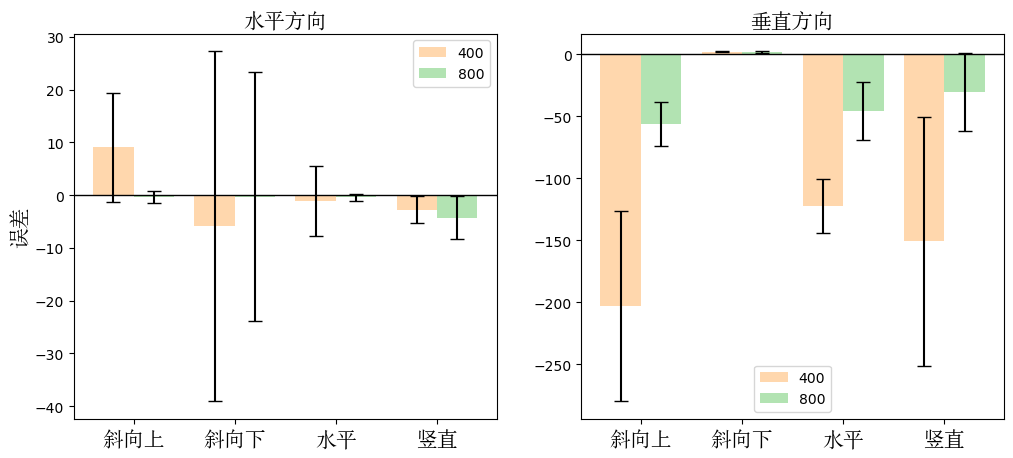

In [6]:
tDirectionHorizontal = df2Selected.groupby(['发射方向', '速度']).apply(tTestHorizontal)
tDirectionVertical = df2Selected.groupby(['发射方向', '速度']).apply(tTestVertical)

for multiIndex,i  in tDirectionHorizontal.items():
    if i[1]<0.05:
        # print(f'horizontal significant{multiIndex}, p = {i[1]}')
        with open ('significanceTest.txt','a') as f:
            f.write(f'horizontal significant{multiIndex}, p = {i[1]}')

for multiIndex,i  in tDirectionVertical.items():
    if i[1]<0.05:
        # print(f'vertical significant{multiIndex}, p = {i[1]}')
        with open ('significanceTest.txt','a') as f:
            f.write(f'vertical significant{multiIndex}, p = {i[1]}')

df2SelectedDirectionHorizontal = df2Selected.groupby(['发射方向','速度'])['水平误差'].agg(['mean','sem'])
df2SelectedDirectionVertical = df2Selected.groupby(['发射方向','速度'])['垂直误差'].agg(['mean','sem'])

df2SelectedDirectionHorizontal400 = df2SelectedDirectionHorizontal.loc[df2SelectedDirectionHorizontal.index.get_level_values('速度') == 400]
df2SelectedDirectionHorizontal800 = df2SelectedDirectionHorizontal.loc[df2SelectedDirectionHorizontal.index.get_level_values('速度') == 800]
labels = df2SelectedDirectionHorizontal400.index.get_level_values(0).to_list()
error800Horizontal = df2SelectedDirectionHorizontal800['mean'].to_list()
error400Horizontal = df2SelectedDirectionHorizontal400['mean'].to_list()
sem400Horizontal = df2SelectedDirectionHorizontal400['sem'].to_list()
sem800Horizontal = df2SelectedDirectionHorizontal800['sem'].to_list()

df2SelectedDirectionVertical400 = df2SelectedDirectionVertical.loc[df2SelectedDirectionVertical.index.get_level_values('速度') == 400]
df2SelectedDirectionVertical800 = df2SelectedDirectionVertical.loc[df2SelectedDirectionVertical.index.get_level_values('速度') == 800]
labels = df2SelectedDirectionVertical400.index.get_level_values(0).to_list()
error400Vertical = df2SelectedDirectionVertical400['mean'].to_list()
error800Vertical = df2SelectedDirectionVertical800['mean'].to_list()
sem400Vertical = df2SelectedDirectionVertical400['sem'].to_list()
sem800Vertical = df2SelectedDirectionVertical800['sem'].to_list()

x = np.arange(len(labels))

fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].bar(x - 0.2, error400Horizontal, yerr=sem400Horizontal, width=0.4, label='400',edgecolor= 'none',capsize = 5,linewidth=.1,color = '#FFD7AD')
axes[0].bar(x + 0.2, error800Horizontal, yerr=sem800Horizontal,width=0.4, label='800',edgecolor='none',capsize = 5,linewidth=.1,color ='#B2E3B2')
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=1)

# axes[0].set_xlabel('Group')
axes[0].set_ylabel('误差',font={'family':'SongTi_GB2312','size':15})
axes[0].set_title('水平方向',font={'family':'SongTi_GB2312','size':15})
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels,font={'family':'SongTi_GB2312','size':15})
axes[0].legend()


axes[1].bar(x - 0.2, error400Vertical, yerr=sem400Vertical, width=0.4, label='400',edgecolor= 'none',capsize = 5,linewidth=.1,color = '#FFD7AD')
axes[1].bar(x + 0.2, error800Vertical, yerr=sem800Vertical,width=0.4, label='800',edgecolor='none',capsize = 5,linewidth=.1,color ='#B2E3B2')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)

# axes[1].set_xlabel('')
# axes[1].set_ylabel('误差')
axes[1].set_title('垂直方向',font={'family':'SongTi_GB2312','size':15})
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels,font={'family':'SongTi_GB2312','size':15})
axes[1].legend()

plt.savefig('Exp2-b.png')
plt.show()
plt.close('all')


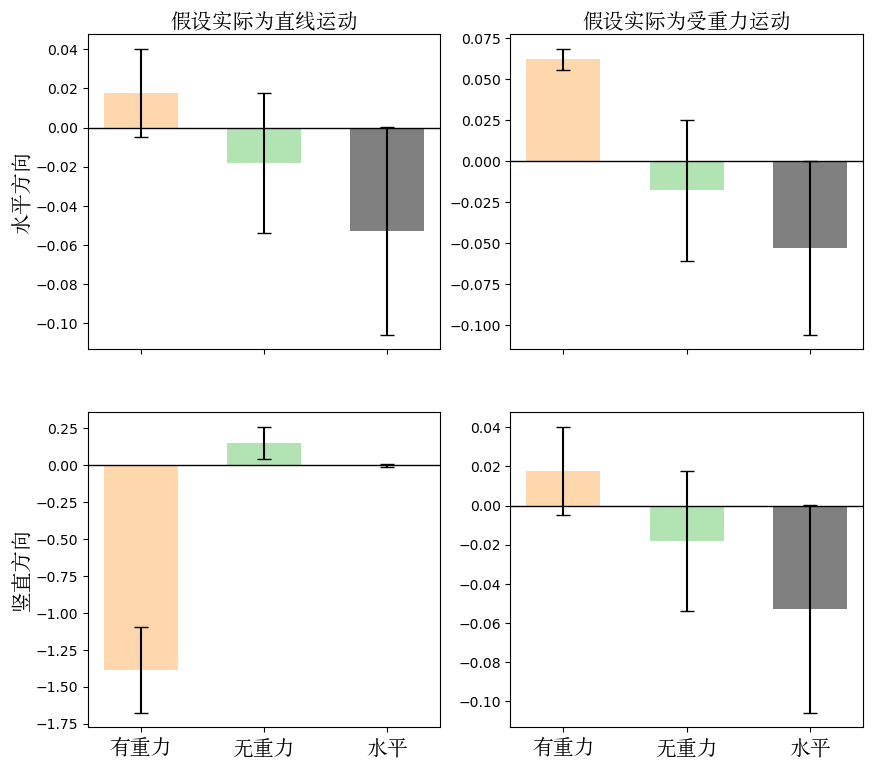

In [7]:
txIfNoGravityPE = df3Selected.groupby(['moveCondition']).apply(tTestNoGravityXPE)
tyIfNoGravityPE = df3Selected.groupby(['moveCondition']).apply(tTestNoGravityYPE)
tyIfGravityPE = df3Selected.groupby(['moveCondition']).apply(tTestGravityYPE)
txIfGravityPE = df3Selected.groupby(['moveCondition']).apply(tTestGravityXPE)

for multiIndex,i  in txIfNoGravityPE.items():
    if i[1]<0.05:
        # print(f'ifNoGravityPredict, {multiIndex} condition,  x sig., p = {i[1]}')
        with open ('significanceTest.txt','a') as f:
            f.write(f'ifNoGravityPredict, {multiIndex} condition,  x sig., p = {i[1]}')
for multiIndex,i  in tyIfNoGravityPE.items():
    if i[1]<0.05:
        # print(f'ifNoGravityPredict, {multiIndex} condition,  y sig., p = {i[1]}')
        with open ('significanceTest.txt','a') as f:
            f.write(f'ifNoGravityPredict, {multiIndex} condition,  y sig., p = {i[1]}')
for multiIndex,i  in txIfGravityPE.items():
    if i[1]<0.05:
        # print(f'ifGravityPredict, {multiIndex} condition,  x sig., p = {i[1]}')
        with open ('significanceTest.txt','a') as f:
            f.write(f'ifGravityPredict, {multiIndex} condition,  x sig., p = {i[1]}')
for multiIndex,i  in tyIfGravityPE.items():
    if i[1]<0.05:
        # print(f'ifGravityPredict, {multiIndex} condition,  y sig., p = {i[1]}')
        with open ('significanceTest.txt','a') as f:
            f.write(f'ifGravityPredict, {multiIndex} condition,  y sig., p = {i[1]}')

df3SelectedGrouped = df3Selected.groupby('moveCondition')[['xIfNoGravityPredictError',
       'yIfNoGravityPredictError', 'xIfGravityPredictError',
       'yIfGravityPredictError']].agg(['mean','sem'])
df3SelectedGrouped.loc[["noGravity", "horizontalMove"]] = df3SelectedGrouped.loc[["horizontalMove", "noGravity"]].to_numpy()
df3SelectedGrouped.index.values[1], df3SelectedGrouped.index.values[2] = df3SelectedGrouped.index.values[2],df3SelectedGrouped.index.values[1]
fig, axes = plt.subplots(2, 2, figsize=(10,9))

x = np.arange(len(df3SelectedGrouped.index.get_level_values(0).to_list())) 
axes[0,0].bar(x, df3SelectedGrouped['xIfNoGravityPredictError']['mean'].tolist(),
              yerr=df3SelectedGrouped['xIfNoGravityPredictError']['sem'].tolist(), 
              width=0.6, label='400',edgecolor= 'none',capsize = 5,linewidth=0.1,
              color = ['#FFD7AD','#B2E3B2','grey'])
axes[0,0].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('水平方向',font = {'family':'Songti_GB2312','size':15})
axes[0,0].set_title('假设实际为直线运动',font = {'family':'Songti_GB2312','size':15})
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels([],font={'family':'SongTi_GB2312','size':15})
# axes[0,0].legend()

xTickLabels = ['有重力','无重力','水平']
axes[1,0].bar(x, df3SelectedGrouped['yIfNoGravityPredictError']['mean'].tolist(),
              yerr=df3SelectedGrouped['yIfNoGravityPredictError']['sem'].tolist(), 
              width=0.6, label='400',edgecolor= 'none',capsize = 5,linewidth=0.1,
              color = ['#FFD7AD','#B2E3B2','grey'])
axes[1,0].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('竖直方向',font = {'family':'Songti_GB2312','size':15})
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(xTickLabels,font={'family':'SongTi_GB2312','size':15})
# axes[1,0].legend()


axes[0,1].bar(x, df3SelectedGrouped['xIfGravityPredictError']['mean'].tolist(),
              yerr=df3SelectedGrouped['xIfGravityPredictError']['sem'].tolist(), 
              width=0.6, label='400',edgecolor= 'none',capsize = 5,linewidth=0.1,
              color = ['#FFD7AD','#B2E3B2','grey'])
axes[0,1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[0,1].set_xlabel('')
# axes[0,1].set_ylabel('水平方向',font = {'family':'Songti_GB2312','size':15})
axes[0,1].set_title('假设实际为受重力运动',font = {'family':'Songti_GB2312','size':15})
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels([],font={'family':'SongTi_GB2312','size':15})
# axes[0,1].legend()


axes[1,1].bar(x, df3SelectedGrouped['xIfNoGravityPredictError']['mean'].tolist(),
              yerr=df3SelectedGrouped['xIfNoGravityPredictError']['sem'].tolist(), 
              width=0.6, label='400',edgecolor= 'none',capsize = 5,linewidth=0.1,
              color = ['#FFD7AD','#B2E3B2','grey'])
axes[1,1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1,1].set_xlabel('')
# axes[1,1].set_ylabel('水平方向',font = {'family':'Songti_GB2312','size':15})
# axes[1,1].set_title('假设实际为直线运动',font = {'family':'Songti_GB2312','size':15})
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(labels = xTickLabels,font={'family':'SongTi_GB2312','size':15})
# axes[1,1].legend()
plt.savefig('Exp3.png')
plt.show()
plt.close('all')
